### Processing the labels of the raw IMDB data

In [1]:
import os
# imdb_dir = "C:/Users/May Phu Paing/Desktop/[2022-2]/Deep learning/Deep learning/Code 2022 2/Langage/aclImdb/aclImdb"
# train_dir = os.path.join(imdb_dir, 'train')

train_dir = "C:/Users/May Phu Paing/Desktop/[2022_2]/Deep learning/Deep learning/Code2022/Langage/aclImdb/aclImdb/train/"
print(train_dir)

labels = []
texts = []


for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    dir_name = dir_name+'/'
    for fname in os.listdir(dir_name): # a list of file name in the pos/neg
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

C:/Users/May Phu Paing/Desktop/[2022_2]/Deep learning/Deep learning/Code2022/Langage/aclImdb/aclImdb/train/


In [2]:
fname

'3018_9.txt'

In [3]:
fname[-4:]

'.txt'

In [4]:
texts

["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
 "This is an example of why the majority of action films are the same. Generic and boring, ther

In [5]:
import numpy as np
np.unique(labels)

C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\May Phu Paing\anaconda3\envs\DL\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


array([0, 1])

### TOKENIZING THE DATA

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 20
training_samples = 10000
validation_samples = 200
max_words = 10000

# create tokenizer 
tokenizer = Tokenizer(num_words=max_words)

# add our text data into tokenizer
tokenizer.fit_on_texts(texts)

# convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# convert to word vectors
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


# padding to have same size
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


# 10000 samples for training
x_train = data[:training_samples]
y_train = labels[:training_samples]

# 200 samples for validation
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 72633 unique tokens.
Shape of data tensor: (17243, 20)
Shape of label tensor: (17243,)


In [7]:
x_train

array([[ 387,   53, 2516, ...,  105,  263,  160],
       [ 603,    5,   25, ...,  160,   15,   66],
       [   9,   13,  232, ...,    6,  195,  492],
       ...,
       [  29,   66, 5344, ...,  609,   36,  233],
       [  49,  104,   49, ...,    4,    6,    6],
       [6650,    4,    2, ..., 1000,  872,  453]])

In [8]:
len(y_train)

10000

In [9]:
glove_dir = "C:/Users/May Phu Paing/Desktop/[2022_2]/Deep learning/Deep learning/Code2022/Langage/glove.6B/"
embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [10]:
values

['sandberger',
 '0.28365',
 '-0.6263',
 '-0.44351',
 '0.2177',
 '-0.087421',
 '-0.17062',
 '0.29266',
 '-0.024899',
 '0.26414',
 '-0.17023',
 '0.25817',
 '0.097484',
 '-0.33103',
 '-0.43859',
 '0.0095799',
 '0.095624',
 '-0.17777',
 '0.38886',
 '0.27151',
 '0.14742',
 '-0.43973',
 '-0.26588',
 '-0.024271',
 '0.27186',
 '-0.36761',
 '-0.24827',
 '-0.20815',
 '0.22128',
 '-0.044409',
 '0.021373',
 '0.24594',
 '0.26143',
 '0.29303',
 '0.13281',
 '0.082232',
 '-0.12869',
 '0.1622',
 '-0.22567',
 '-0.060348',
 '0.28703',
 '0.11381',
 '0.34839',
 '0.3419',
 '0.36996',
 '-0.13592',
 '0.0062694',
 '0.080317',
 '0.0036251',
 '0.43093',
 '0.01882',
 '0.31008',
 '0.16722',
 '0.074112',
 '-0.37745',
 '0.47363',
 '0.41284',
 '0.24471',
 '0.075965',
 '-0.51725',
 '-0.49481',
 '0.526',
 '-0.074645',
 '0.41434',
 '-0.1956',
 '-0.16544',
 '-0.045649',
 '-0.40153',
 '-0.13136',
 '-0.4672',
 '0.18825',
 '0.2612',
 '0.16854',
 '0.22615',
 '0.62992',
 '-0.1288',
 '0.055841',
 '0.01928',
 '0.024572',
 '0.46

In [11]:
word

'sandberger'

In [12]:
coefs

array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
       -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
        0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
        0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
       -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
       -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
        0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
       -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
        0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
        0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
        0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
        0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
        0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
       -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
        0.2612   ,  0.16854  ,  0.22615  ,  0.62992  , -0.1288

In [13]:
embeddings_index

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [39]:
# Words not found in the embedding index will be all zeros.

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [41]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       ...,
       [ 0.44156   , -0.11708   ,  0.75514001, ..., -1.01660001,
        -0.005395  , -0.88195997],
       [ 0.58248001,  0.096664  , -0.033106  , ...,  1.19930005,
        -0.056846  , -0.57341999],
       [ 0.41595   ,  0.047901  ,  0.03427   , ..., -0.24789   ,
         0.066317  , -0.19796   ]])

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [24]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.5713 - acc: 0.7273 - val_loss: 0.5869 - val_acc: 0.7100
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5157 - acc: 0.7489 - val_loss: 0.5388 - val_acc: 0.7150
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4774 - acc: 0.7713 - val_loss: 0.5319 - val_acc: 0.7600
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4418 - acc: 0.7931 - val_loss: 0.5916 - val_acc: 0.6850
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3954 - acc: 0.8219 - val_loss: 0.6538 - val_acc: 0.6050
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3430 - acc: 0.8546 - val_loss: 0.6043 - val_acc: 0.7450
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2882 - acc: 0.8830 - val_loss: 0.6527 - val_acc: 0.6650
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.

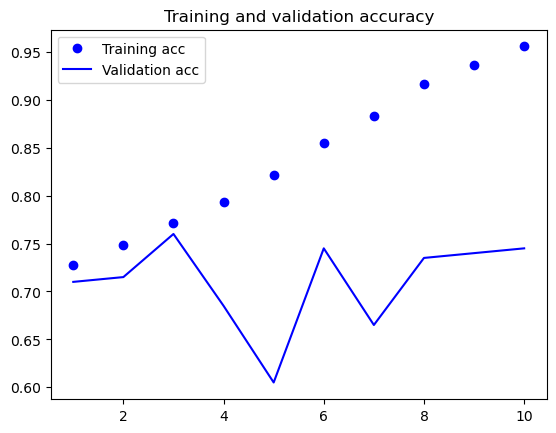

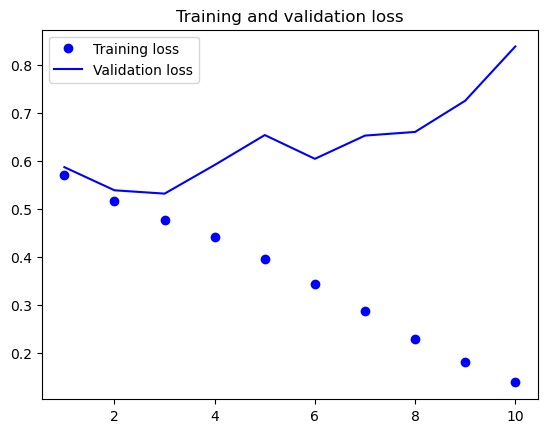

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Training the same model without pretrained word embeddings

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

### no weights setting

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                64032     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,064,065
Trainable params: 1,064,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 3s 8ms/step - loss: 0.5200 - acc: 0.7484 - val_loss: 0.4987 - val_acc: 0.7650
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.3268 - acc: 0.8620 - val_loss: 0.5

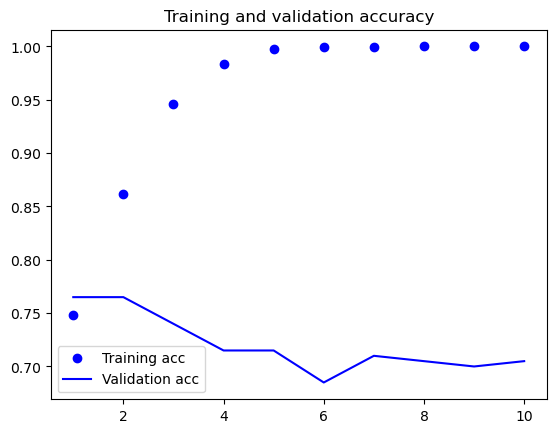

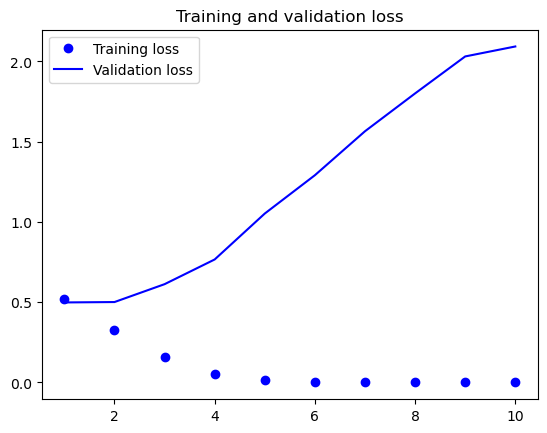

In [45]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()